<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems </font></center></h2>    
<h2><center> <font color='black'> Due date : 05 April 23:59 </font></center></h2>    

<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

# Homework instructions 

- Insert your team member names and student IDs in the field "Team mates" below. If you are not working in a team please insert only your name, surname and student ID 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close at 12:00 am, so please make sure you have enough time to submit the homework. 

- Only one of the teammates should submit the homework. We will grade and give points to both of you! 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 


**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name Surname: Octanty Mulianingtyas</font>&emsp;   <font color='red'>Student ID: B96328</font>


<font color='red'>Name Surname: XXXXX</font>&emsp;   <font color='red'>Student ID: YYYY</font>


# 1. Classification tasks and algorithms (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to causes like retirement, resignation, elimination of a position, personal health etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [262]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [263]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,80,6,3,3,2,2,2,2


## 1.1 Dataset exploration (1.6 points)

**1.1.0.
Plot the correlation of the variables in the dataset with the Attrition variable. (0.4 points)**

<function matplotlib.pyplot.show(*args, **kw)>

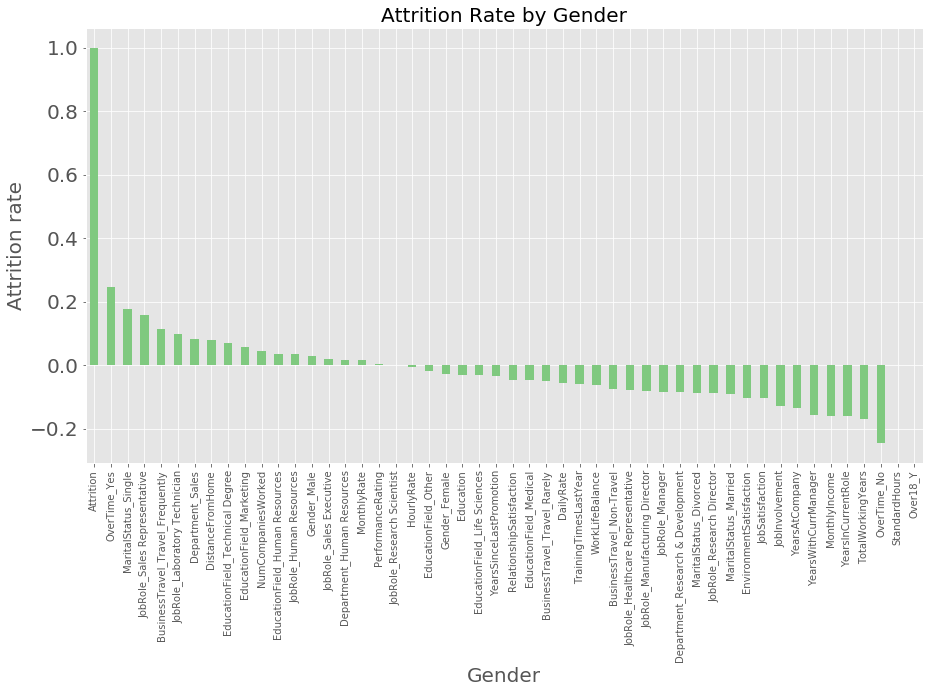

In [264]:
df2 = hr_data.iloc[:,1:]

# https://www.datacamp.com/community/tutorials/data-preparation-with-pandas
# Data types
#Convertin the predictor variable in a binary numeric variable
df2['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
df2['Attrition'].replace(to_replace='No',  value=0, inplace=True)


#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

import matplotlib.cm as cm
from sklearn.preprocessing import normalize
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
#df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.style.use('ggplot')

# https://stackoverflow.com/questions/47302343/what-names-can-be-used-in-plt-cm-get-cmap
# Get a color map
my_cmap = cm.get_cmap('Accent')
df_dummies.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title('Attrition Rate by Gender',fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Attrition rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show

**1.1.1. Write three interesting observation that you notice. Were they as you  expected ? Please elaborate your answer in 1 - 3 sentences. (0.4 points)**

**<font color='red'>Answer 1: There is significant gap between Attrition rate in category OverTime_Yes and Overtime_No. In which,in overtime_yes, it reaches aproximately 0.3. In contrast, in overtime_no, it reaches around -0.3, as my expectation, In which people who are working overtime want to resign from their job  </font>** 

**<font color='red'>Answer 2: In MaritalStatus_Married, the attrition rate is lower than MaritalStatus_Single, as my expectation, In which people who are already married prefer to retain in their job</font>** 

**<font color='red'>Answer 3: In JobRole_Manager, the attrition rate is low which gets -0.1, as my expectation, In which, people who are already in good position prefer to retain their job</font>** 

**1.1.2 Make a boxplot for total working years for each type of Attrition values. (0.4 points)**

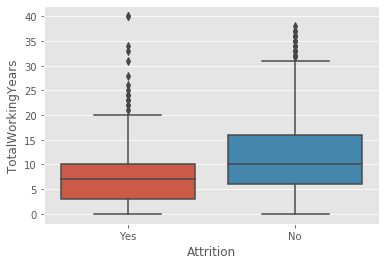

In [265]:
import seaborn as sns
sns.boxplot(x= hr_data.Attrition, y= hr_data.TotalWorkingYears)

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.4 points)**

(array([1.6122449, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 8.3877551]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

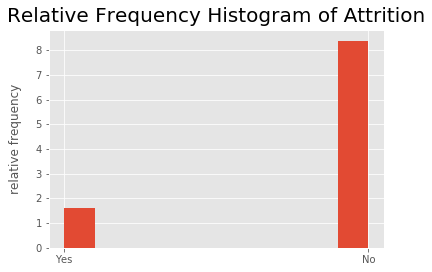

In [266]:
import matplotlib.pyplot as plt
x= hr_data.Attrition
plt.ylabel("relative frequency", labelpad=14)
plt.title("Relative Frequency Histogram of Attrition", fontsize=20, y=1.01);
plt.hist(x, density=True)

## 1.2 Classification  (6.4 points)

We are going to predict the variable Attrition by trying different classification algorithms and comparing them. Before let's split the data into training and test set. Hint: You can apply some preprocessing as well to get better results.

In [267]:
y = df_dummies['Attrition'].values
X = df_dummies.drop(columns = ['Attrition'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler


features = X.columns.values

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

X.columns = features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [268]:
def _plot_classification_report(y_true, y_pred_class):
    from sklearn.metrics import classification_report
    report = classification_report(y_true, y_pred_class, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(4)

    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=report_df.values,
             colLabels=report_df.columns,
             rowLabels=report_df.index,
             loc='center',
             bbox=[0.2, 0.2, 0.8, 0.8])
    fig.tight_layout()

    return fig 

**1.2.1 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [269]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

model = DT(random_state=0)
clf=model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy of DecisionTreeClassifier on test set: ', metrics.accuracy_score(y_test, y_pred))



Accuracy of DecisionTreeClassifier on test set:  0.7857142857142857


**1.2.2 Plot the confusion matrix for the predicted values. Based on this matrix or your general knowledge, why accuracy is not a good metric to use in this case ? (0.4 points)**

Confusion Matrix
[[216  29]
 [ 34  15]]


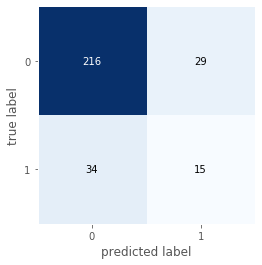

In [270]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix")
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix) 

binary = confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()


**1.2.3 We want to use a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like ? (0.4 points)**

**<font color='red'>Answer 1: The label ratio should be 80%:20% , 4:1 In which train size is 80% and test size is 20%, when I tried to execute accuracy by model Random Forest Classifier and SVM in this ratio, it will result 85.03% accuracy, close to 83.88%</font>** 

**1.2.4 It is possible to plot the decision tree by using different plotting libraries. We are using the https://pypi.org/project/graphviz/ and sklearn.tree. Install the package and complete the code below so you will get a visualisation of our decision tree. (0.4 points)**

In [271]:
from sklearn.tree import export_graphviz
import graphviz
dot_prod = export_graphviz(clf, out_file=None, feature_names=X.columns,
                class_names=True, filled=True, rounded=True,
                special_characters=False)

graph = graphviz.Source(dot_prod)
graph



ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**1.2.5 For the decision tree we modeled, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

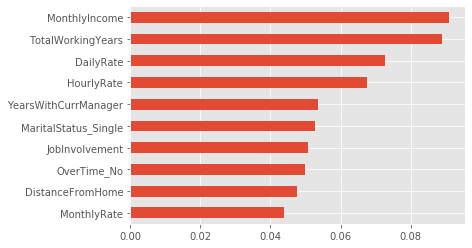

In [272]:
importances = model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**<font color='red'>Answer 1: The most important factor is Monthly Income, TotalWorkingYears, and DailyRate</font>** 

**1.2.6 Plot the classification report for the decision tree. In this case study which one out of  precision and recall, would you consider more important ? Please elaborate your answer. (0.4 points)**

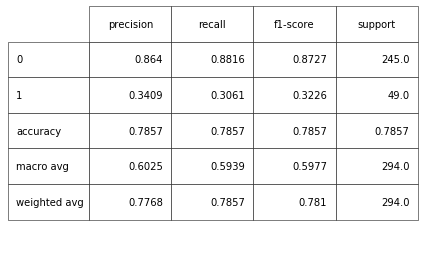

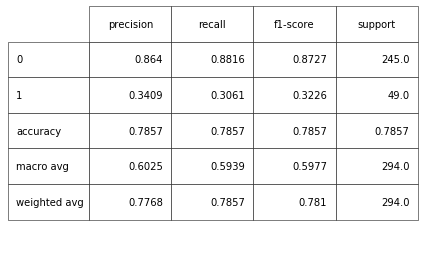

In [273]:
_plot_classification_report(y_test, y_pred)

**<font color='red'>Answer 1: In this case, Recall is important since it tells out of actual positive data, how many times we can predict correctly, because this case (Attrition) should be predicted correctly</font>** 


**1.2.7 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the effect happening ? (0.4 points)**

**<font color='red'>Answer 1: the f1 score of test data results a little bit lower than f1 score in train data</font>** 

In [274]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(clf, X_train,y_train, cv=2)
print(f"\nF1_score in train data:", f1_score(y_train, predicted))

print(f"\nF1_score in test data:", f1_score(y_test, y_pred))





F1_score in train data: 0.36363636363636365

F1_score in test data: 0.3225806451612903


**1.2.8 We can use cross validation scores to ensure that our model is generalizing well and we can be more confident when we apply it in test data. We will now try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.4 points)**

In [275]:
from sklearn.model_selection import cross_val_score
best_score = 0
best_depth = 0
best_max_depth = 0
depth = []
for i in range(5,20):
    clf = DT(max_depth=i, random_state = 0)
    # Perform 5-fold cross validation. 
    # The number of folds you want to use generally depends from the size of data
    scores = cross_val_score(estimator= clf, scoring="f1", X=X, y=y, cv=5)
    mean_score = scores.mean()
    # TODO
    depth.append(mean_score)
    print('Mean score', mean_score)

best_depth = max(depth)
print('\n The best tree depth is: ', best_depth )


Mean score 0.38470261642867487
Mean score 0.38553414850437495
Mean score 0.3889895773879608
Mean score 0.3863059250172592
Mean score 0.3944574892053335
Mean score 0.3888547830296366
Mean score 0.37802356267964166
Mean score 0.3872855755744956
Mean score 0.38273018949923554
Mean score 0.39061807147961913
Mean score 0.38003321801322804
Mean score 0.3885144138748655
Mean score 0.36977497617160937
Mean score 0.3787134502923976
Mean score 0.37657441285924254

 The best tree depth is:  0.3944574892053335


**1.2.9 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [276]:
from sklearn import svm

model_svm = SVC(kernel='linear', random_state=0, probability=1) 
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)


probs = model_svm.predict_proba(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)


print('Accuracy of Support Vecor Machine (SVM) on test set: ', metrics.accuracy_score(y_test, preds))
print('Recall of Support Vecor Machine (SVM) on test set: ', metrics.recall_score(y_test, preds))
print('Precision of Support Vecor Machine (SVM) on test set: ', metrics.precision_score(y_test, preds))
print('f1-score of Support Vecor Machine (SVM) on test set: ', f1_score(y_test, preds))
print('AUC of Support Vecor Machine (SVM) on test set: ', roc_auc)

Accuracy of Support Vecor Machine (SVM) on test set:  0.8775510204081632
Recall of Support Vecor Machine (SVM) on test set:  0.3877551020408163
Precision of Support Vecor Machine (SVM) on test set:  0.76
f1-score of Support Vecor Machine (SVM) on test set:  0.5135135135135135
AUC of Support Vecor Machine (SVM) on test set:  0.8493960849645981


**1.2.10 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [277]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(random_state=0)
modelLR.fit(X_train,y_train)
predicts = modelLR.predict(X_test)

probs = modelLR.predict_proba(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)


print('Accuracy of Logistic Regression on test set: ', metrics.accuracy_score(y_test, predicts))
print('Recall of Logistic Regression on test set: ', metrics.recall_score(y_test, predicts))
print('Precision of Logistic Regression on test set: ', metrics.precision_score(y_test, predicts))
print('f1-score of Logistic Regression on test set: ', f1_score(y_test, predicts))
print('AUC of Logistic Regression on test set: ', roc_auc)

Accuracy of Logistic Regression on test set:  0.8877551020408163
Recall of Logistic Regression on test set:  0.4489795918367347
Precision of Logistic Regression on test set:  0.7857142857142857
f1-score of Logistic Regression on test set:  0.5714285714285714
AUC of Logistic Regression on test set:  0.8614743856726365


**1.2.11 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.4 points)**


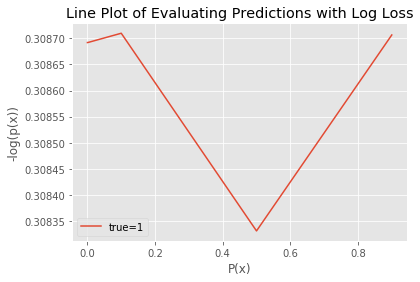

In [278]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import log_loss
from matplotlib import pyplot

yhat = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
accuracy = []
for tol in yhat:
    lr = LR(tol = tol, random_state = 0 )
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    probs = lr.predict_proba(X_test)
    # keep the predictions for class 1 only
    probs = probs[:, 1]
    # calculate log loss
    loss = log_loss(y_test, probs)

    accuracy.append(loss)

accuracy

pyplot.plot(yhat, accuracy, label='true=1')
pyplot.legend()
plt.title('Line Plot of Evaluating Predictions with Log Loss')
plt.xlabel("P(x)")
plt.ylabel("-log(p(x))")
pyplot.show()

**<font color='red'>Answer 1: The better toll values is 0.5, because it result the lowest log loss(more close to 0.0 than others) which reaches  0.3083309887001041 </font>** 


**1.2.12 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

Accuracy of Random Forest Classifier on test set:  0.8503401360544217
Recall of Random Forest Classifier on test set:  0.12244897959183673
Precision of Random Forest Classifier on test set:  0.8571428571428571
f1-score of Random Forest Classifier on test set:  0.21428571428571427
AUC of Random Forest Classifier on test set:  0.5938775510204082


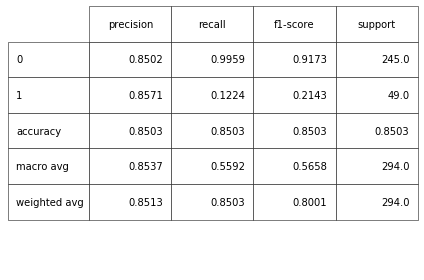

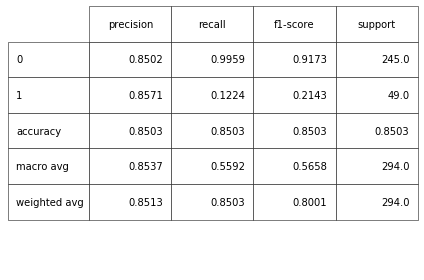

In [279]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =0, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)


prediction_test = model_rf.predict(X_test)

probs = model.predict_proba(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)

print('Accuracy of Random Forest Classifier on test set: ', metrics.accuracy_score(y_test, prediction_test))
print('Recall of Random Forest Classifier on test set: ', metrics.recall_score(y_test, prediction_test))
print('Precision of Random Forest Classifier on test set: ', metrics.precision_score(y_test, prediction_test))
print('f1-score of Random Forest Classifier on test set: ', f1_score(y_test, prediction_test))
print('AUC of Random Forest Classifier on test set: ', roc_auc)
_plot_classification_report(y_test, prediction_test)

**1.2.13 Get the probabilities for each class from Random Forest model. Threshold the probabilities such that it will output the class No  only if the model is 70% or higher confident. In all other cases it will predict the class Yes. (0.4 points)**


In [280]:
df_dummies['proba'] = model_rf.predict_proba(df_dummies[X_train.columns])[:,1]

df_dummies['proba'] = np.where(df_dummies['proba']>=0.70, 'No', 'Yes')
df_dummies['proba'].head()


0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: proba, dtype: object

**1.2.14 Build again the classification matrix. Do you think there were some improvements regarding the classification for class Yes ? Explain your answer briefly. (0.4 points)** 

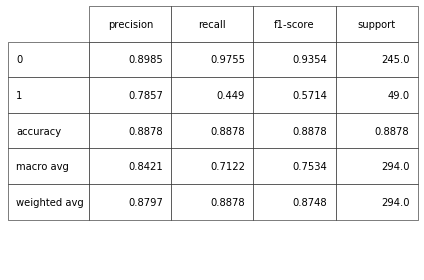

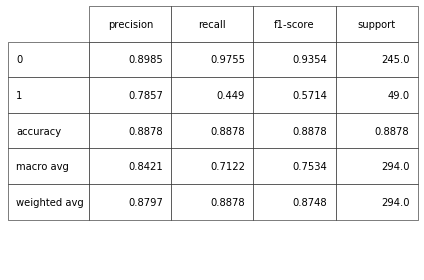

In [281]:
df_dummies['proba'].replace(to_replace='Yes', value=1, inplace=True)
df_dummies['proba'].replace(to_replace='No',  value=0, inplace=True)


_plot_classification_report(y_test, y_pred)

**<font color='red'>Answer 1: There were not some improvements because the probabilities does not influence the df_dummies values, the dummies_values is influenced by Attrition</font>** 

**1.2.15 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.4 points)**

In [282]:
#!pip install xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
prediction_test = xgb_model.predict(X_test)

probs = xgb_model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)

print('Accuracy of XGB Classifier on test set: ', metrics.accuracy_score(y_test, prediction_test))
print('Recall of XGB Classifier on test set: ', metrics.recall_score(y_test, prediction_test))
print('Precision of XGB Classifier on test set: ', metrics.precision_score(y_test, prediction_test))
print('f1-score of XGB Classifier on test set: ', f1_score(y_test, prediction_test))
print('AUC of XGB Classifier on test set: ', roc_auc)

Accuracy of XGB Classifier on test set:  0.8639455782312925
Recall of XGB Classifier on test set:  0.22448979591836735
Precision of XGB Classifier on test set:  0.8461538461538461
f1-score of XGB Classifier on test set:  0.3548387096774194
AUC of XGB Classifier on test set:  0.7599333610995418


**1.2.16 Based on your answer from 1.2.6 and other important evaluation metrics for unbalanced datasets, choose the best classifier and plot its feature importances in decreasing order. Were the 3 most important features as you expected ? Please explain why. (0.4 points)**

**<font color='red'>Answer 1: The classifier that I choosed is Random Forest Classifier which results 3 most important features consisted of MonthlyIncome, TotalWorkingYears, Overtime_Yes, These 3 Features as my expectation since I think that the number of MonthlyIncome, the number of TotalWorkingYears, and the number of working overtime (Overtime_Yes) will give most influences to number of Attrition </font>** 

# 2. Improving classification (2 points)

In this task we will try to improve the performance of the best classifier you selected on 1.2.12 by using several techniques. 

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer 1: no, i think downsampling is better than oversampling, because oversampling will result overfitting. Then altough one of risk of downsampling is lossing of information,  statistically, it shouldn’t have an effect on model performance.</font>** 

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.4 points)**

In [283]:
#!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 1233), (1, 1233)]


**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
prediction_test = model_rf.predict(X_test)

probs = model_rf.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)

print('Accuracy of Random Forest Classifier on test set: ', metrics.accuracy_score(y_test, prediction_test))
print('Precision of Random Forest Classifier on test set: ', metrics.precision_score(y_test, prediction_test))
print('Recall of Random Forest Classifier on test set: ', metrics.recall_score(y_test, prediction_test))
print('f1-score of Random Forest Classifier on test set: ', f1_score(y_test, prediction_test))
print('AUC of Random Forest Classifier on test set: ', roc_auc)

Accuracy of Random Forest Classifier on test set:  0.6032388663967612
Precision of Random Forest Classifier on test set:  1.0
Recall of Random Forest Classifier on test set:  0.25475285171102663
f1-score of Random Forest Classifier on test set:  0.40606060606060607
AUC of Random Forest Classifier on test set:  0.8934867413954867


**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.4 points)**

In [285]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 237), (1, 237)]


**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
prediction_test = model_rf.predict(X_test)

probs = model_rf.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, class_1_probs)
roc_auc = auc(fpr, tpr)

print('Accuracy of Random Forest Classifier on test set: ', metrics.accuracy_score(y_test, prediction_test))
print('Precision of Random Forest Classifier on test set: ', metrics.precision_score(y_test, prediction_test))
print('Recall of Random Forest Classifier on test set: ', metrics.recall_score(y_test, prediction_test))
print('f1-score of Random Forest Classifier on test set: ', f1_score(y_test, prediction_test))
print('AUC of Random Forest Classifier on test set: ', roc_auc)

Accuracy of Random Forest Classifier on test set:  0.7157894736842105
Precision of Random Forest Classifier on test set:  1.0
Recall of Random Forest Classifier on test set:  0.4
f1-score of Random Forest Classifier on test set:  0.5714285714285715
AUC of Random Forest Classifier on test set:  0.9546666666666667


## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>

**<font color='red'>(please change X in the next cell into your estimate)</font>**

13 hours

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:*6*</font>